In [1]:
#!git clone https://github.com/pieper/dicomsort.git
!pip install pydicom
#!python dicomsort/dicomsort.py --help

     |████████████████████████████████| 2.0 MB 7.6 MB/s eta 0:00:01


In [2]:
!pip install pylidc

     |████████████████████████████████| 5.6 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 72.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.2 MB 73.9 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 79.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 91.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 69.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 81.6 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 73.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 93.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 74.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 76.9 MB/s eta 0:00:01
     |████████████████████████████████| 150 kB 77.6 MB/s eta 0:00:01


In [3]:
import pylidc as pl
from pylidc.utils import consensus
import pydicom as dicom
from skimage.measure import find_contours
#import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd

In [4]:
pl.query(pl.Scan).count()
pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
scan.study_instance_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288633453246975630178'

### Download the data from IDC

In [5]:
myProjectID = "idc-external-012"

In [6]:
# from google.colab import auth
# auth.authenticate_user()

In [7]:
pip install google-cloud-bigquery

     |████████████████████████████████| 201 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 82.5 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 92 kB 773 kB/s  eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0+nv requires grpcio~=1.34.0, but you have grpcio 1.40.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install --upgrade google-auth-oauthlib

  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.5
    Uninstalling google-auth-oauthlib-0.4.5:
      Successfully uninstalled google-auth-oauthlib-0.4.5


In [9]:
from google_auth_oauthlib import flow

# TODO: Uncomment the line below to set the `launch_browser` variable.
launch_browser = False
#
# The `launch_browser` boolean variable indicates if a local server is used
# as the callback URL in the auth flow. A value of `True` is recommended,
# but a local server does not work if accessing the application remotely,
# such as over SSH or from a remote Jupyter notebook.

appflow = flow.InstalledAppFlow.from_client_secrets_file(
    "client_secret_desktop.json", scopes=["https://www.googleapis.com/auth/bigquery"]
)

if launch_browser:
    appflow.run_local_server()
else:
    appflow.run_console()

credentials = appflow.credentials

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=354066013909-il5lh54dbass54iv45m7thff0uuefjar.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=JcWMP7Q9yZLt2WJNKBVXAeyp1sxaMU&prompt=consent&access_type=offline


Enter the authorization code:  4/1AX4XfWgc8MoOXM-eZOWL5bbn-0pIxUuNawuB-3DbohXwLKxaPoMXI39VXWE


In [10]:
!pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

     |████████████████████████████████| 131 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 23.6 MB 57.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 67.6 MB/s eta 0:00:01
     |████████████████████████████████| 514 kB 76.2 MB/s eta 0:00:01


In [12]:
%load_ext google.cloud.bigquery

In [13]:
credentials

In [14]:
from google.cloud.bigquery import magics
magics.context.credentials = credentials

In [14]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 11.83rows/s]


,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [15]:
%%bigquery CT_series --project=$myProjectID 

WITH
  all_lidc_ct_series AS (
  SELECT
    DISTINCT(SeriesInstanceUID),
    StudyInstanceUID,  
    PatientID,
    SliceThickness,
    ARRAY_TO_STRING(PixelSpacing,"/") as pixelspa 
  FROM
    `canceridc-data.idc_views.dicom_all`
  WHERE
    Modality = "CT"
    AND collection_id = "lidc_idri")
SELECT PatientID,SliceThickness,pixelspa,StudyInstanceUID,SeriesInstanceUID FROM
  all_lidc_ct_series
ORDER BY
  PatientID

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1018/1018 [00:01<00:00, 810.74rows/s]


In [17]:
print(CT_series.shape)
CT_series.head()

(1018, 5)


,PatientID,SliceThickness,pixelspa,StudyInstanceUID,SeriesInstanceUID
0,LIDC-IDRI-0001,2.500000,0.703125/0.703125,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...
1,LIDC-IDRI-0002,1.250000,0.681641/0.681641,1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...
2,LIDC-IDRI-0003,2.500000,0.820312/0.820312,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...
3,LIDC-IDRI-0004,1.250000,0.822266/0.822266,1.3.6.1.4.1.14519.5.2.1.6279.6001.191425307197...,1.3.6.1.4.1.14519.5.2.1.6279.6001.323541312620...
4,LIDC-IDRI-0005,2.500000,0.664062/0.664062,1.3.6.1.4.1.14519.5.2.1.6279.6001.190188259083...,1.3.6.1.4.1.14519.5.2.1.6279.6001.129007566048...


In [18]:
!pip install seaborn

     |████████████████████████████████| 292 kB 7.3 MB/s eta 0:00:01


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'PixelSpacing, mm')]

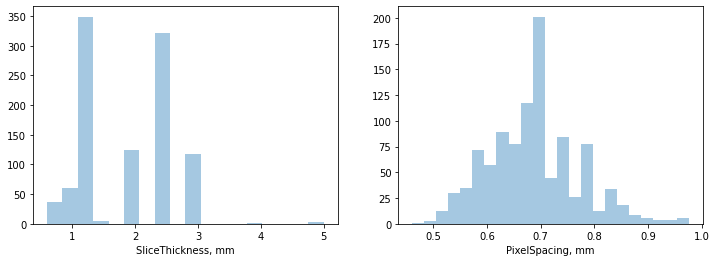

In [19]:
%matplotlib inline
import seaborn as sb
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax=sb.distplot(CT_series["SliceThickness"].astype(float),kde=False)
ax.set(xlabel="SliceThickness, mm")

plt.subplot(1,2,2)
xSpacing = CT_series["pixelspa"].str.split('/',n=1,expand=True)[0].astype(float)
ax=sb.distplot(xSpacing, kde=False)
ax.set(xlabel="PixelSpacing, mm")

In [20]:
import pandas as pd
s_1,s_2,s_3 = 5,5,5
ct_series_1 = CT_series[CT_series["SliceThickness"].astype(float)==1.0]
ct_series_2 = CT_series[CT_series["SliceThickness"].astype(float)==2.0]
ct_series_3 = CT_series[CT_series["SliceThickness"].astype(float)==3.0]
ct_series_HR = pd.concat([ct_series_1[:s_1],ct_series_2[:s_2],ct_series_3[:s_3]])

In [21]:
to_download = []
base_gs_uri = 'gs://idc-tcia-lidc-idri/dicom/'

for i in range(ct_series_HR.shape[0]):
    to_download.append(base_gs_uri + ct_series_HR.iloc[i]['StudyInstanceUID'] + '/' + ct_series_HR.iloc[i]['SeriesInstanceUID'])

manifest_df = pd.DataFrame({"gcs":to_download},columns=["gcs"])

In [23]:
manifest_df.head()

,gcs
0,gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
1,gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
2,gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
3,gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
4,gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...


In [13]:
manifest_df.to_csv("gcs_paths_3.txt",header=False, index=False)
!head gcs_paths_3.txt

gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.165017330457520545748655969705/1.3.6.1.4.1.14519.5.2.1.6279.6001.324290109423920971676288828329
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.265704884949271879044145982159/1.3.6.1.4.1.14519.5.2.1.6279.6001.154677396354641150280013275227
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.815399168774050638734383723372/1.3.6.1.4.1.14519.5.2.1.6279.6001.725023183844147505748475581290
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.311849240521371267537044867782/1.3.6.1.4.1.14519.5.2.1.6279.6001.387954549120924524005910602207
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.303241414168367763244410429787/1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905446238286154504249
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.

In [14]:
!pip install gsutil

     |████████████████████████████████| 2.9 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 66.2 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 7.6 MB/s s eta 0:00:01
     |████████████████████████████████| 98 kB 11.8 MB/s eta 0:00:01
  Created wheel for gsutil: filename=gsutil-4.68-py3-none-any.whl size=3706852 sha256=b764902422e8ddf0c4ec050c2a98c5a0c2eeb0a5951f282a428c31b53c0f827a
  Stored in directory: /root/.cache/pip/wheels/2a/f8/66/d541b0ac6e52999c622fbe4265bf8863559317903650e48f84
  Created wheel for crcmod: filename=crcmod-1.7-cp38-cp38-linux_x86_64.whl size=35488 sha256=c9fe24febed8f50b16edc4f46277ed2b8e4f21c52bdc940814ffb752c32de221
  Stored in directory: /root/.cache/pip/wheels/ca/5a/02/f3acf982a026f3319fb3e798a8dca2d48fafee7761788562e9
  Created wheel for gcs-oauth2-boto-plugin: filename=gcs_oauth2_boto_plugin-2.7-py3-none-any.whl size=23202 sha256=bcd46518c524ceea0e95

In [28]:
!rm -rf downloaded_cohort_3

In [15]:
!mkdir downloaded_cohort_3
!cat gcs_paths_3.txt | gsutil -u $myProjectID -m cp -Ir ./downloaded_cohort_3

mkdir: cannot create directory ‘downloaded_cohort_3’: File exists
Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.102247975018680800877284400958.dcm...
Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.101886964201437446907268755262.dcm...
Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.100191094280203283283021962486.dcm...
Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.103419256422

In [16]:
!python dicomsort/dicomsort.py -u downloaded_cohort_3 cohort_sorted_3/%PatientID/%StudyInstanceUID/%SeriesInstanceUID/%SOPInstanceUID.dcm

  0%|                                                  | 0/3448 [00:00<?, ?it/s]
Source file: downloaded_cohort_3/1.3.6.1.4.1.14519.5.2.1.6279.6001.288701997968615460794642979503/1.3.6.1.4.1.14519.5.2.1.6279.6001.284310817653432386643042030032.dcm
Target file: cohort_sorted_3/LIDC-IDRI-0084/1.3.6.1.4.1.14519.5.2.1.6279.6001.198480745206106280149820227940/1.3.6.1.4.1.14519.5.2.1.6279.6001.288701997968615460794642979503/1.3.6.1.4.1.14519.5.2.1.6279.6001.284310817653432386643042030032.dcm

Target file already exists - pattern is probably not unique
Aborting to avoid data loss.
  0%|                                                  | 0/3448 [00:00<?, ?it/s]


In [23]:
import os
data_folder = os.getcwd() + '/cohort_sorted_3/'
data_folder

'/app/cohort_sorted_3/'

In [24]:
#f = open ('.pylidcrc','w')            #For GCP
f = open ('/root/.pylidcrc','w')    #For Colab
f.write('[dicom]'+'\n')
f.write('path =' + data_folder +'\n')
f.write('warn = True')
f.close()

Current patient ID = LIDC-IDRI-0098
Loading dicom files ... This may take a moment.


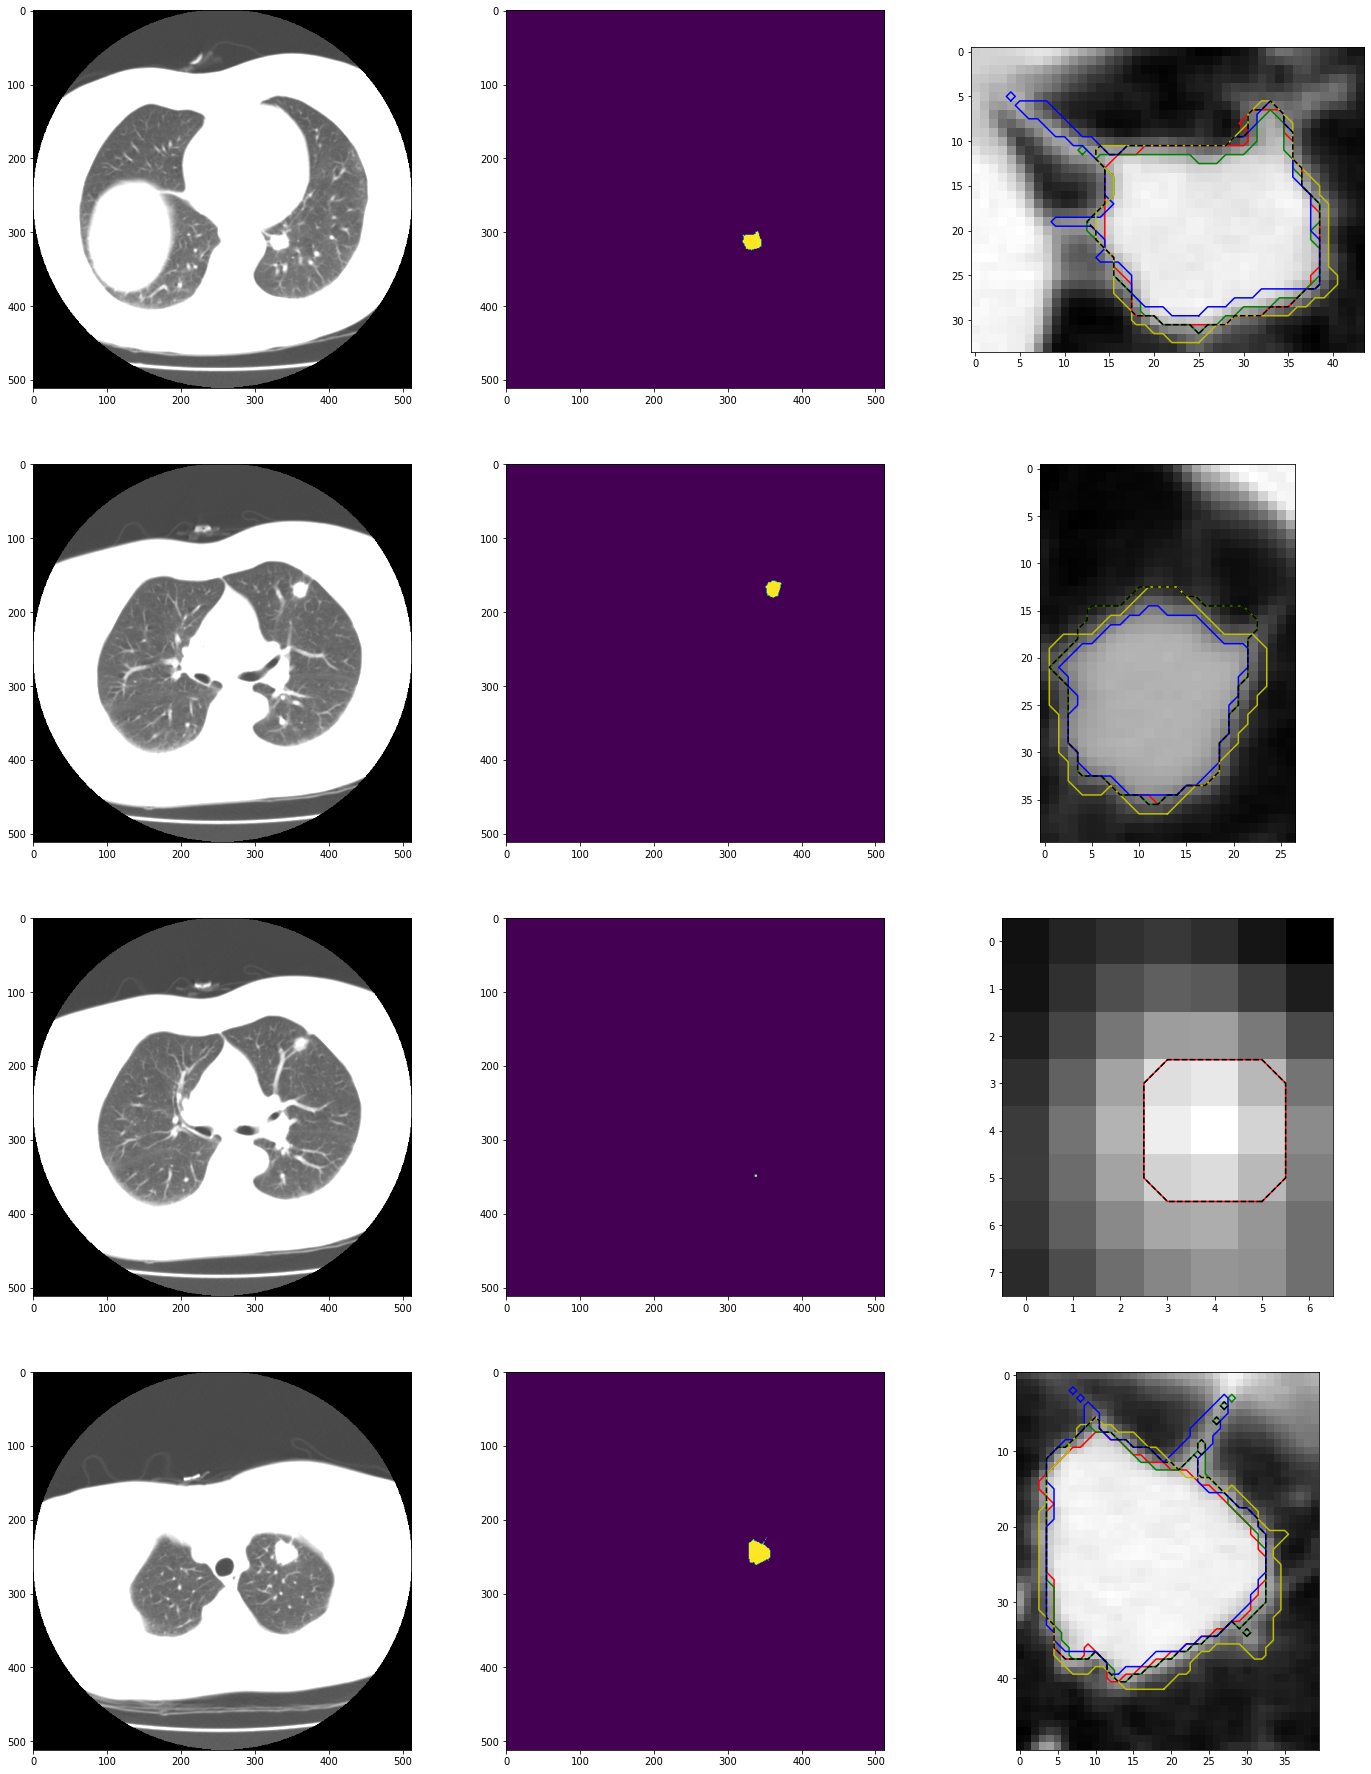

In [26]:
%matplotlib inline

cohort = data_folder
patient_list = os.listdir(cohort)
patient_select = 0

print ("Current patient ID =", patient_list[patient_select])

scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))
nodules_annotation = scan[patient_select].cluster_annotations()
vol = scan[patient_select].to_volume()

cmask_CT = []
cbbox_CT = []
masks_CT = []
for nodule_idx, nodule in enumerate(nodules_annotation):
    cmask, cbbox, masks = consensus(nodule)
    cmask_CT.append(cmask)
    cbbox_CT.append(cbbox)
    masks_CT.append(masks)   

nodule_num = len(cmask_CT)
plt.figure(figsize=(8*3,8*nodule_num))
for i in range(nodule_num):
    cmask = cmask_CT[i]
    cbbox = cbbox_CT[i]
    masks = masks_CT[i]
    k = int(0.5*(cbbox[2].stop - cbbox[2].start))
    k_slice = k + cbbox[2].start
    plt.subplot(nodule_num,3,1+i*3)
    plt.imshow(vol[:,:,k_slice],cmap='gray')
    plt.clim(vmin=-1350,vmax=-150)
    
    plt.subplot(nodule_num,3,2+i*3)
    CT_mask = np.zeros_like(vol)
    CT_mask[cbbox] = cmask
    plt.imshow(CT_mask[:,:,k_slice])

    plt.subplot(nodule_num,3,3+i*3)
    plt.imshow(vol[cbbox][:,:,k],cmap='gray')
    # Plot the annotation contours for the kth slice.
    colors = ['r', 'g', 'b', 'y']
    for j in range(len(masks)):
        for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
            label = "Annotation %d" % (j+1)
            plt.plot(c[:,1], c[:,0], colors[j], label=label)

    # Plot the 50% consensus contour for the kth slice.
    for c in find_contours(cmask[:,:,k].astype(float), 0.5):
        plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

In [43]:

CT_image_data = []
CT_mask_data  = []

for pa in range(len(patient_list)):
    print ("Current patient ID =", patient_list[pa])
    
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))
    nodules_annotation = scan[pa].cluster_annotations()
    vol = scan[pa].to_volume()
    
    CT_image_data.append(vol)
    
    cmask_CT = []
    cbbox_CT = []
    masks_CT = []
    for nodule_idx, nodule in enumerate(nodules_annotation):
        cmask, cbbox, masks = consensus(nodule)
        cmask_CT.append(cmask)
        cbbox_CT.append(cbbox)
        masks_CT.append(masks)   

    CT_mask = np.zeros_like(vol)    
    nodule_num = len(cmask_CT)
    print("Length of nodules = {}".format(nodule_num))
    for i in range(nodule_num):
        cmask = cmask_CT[i]
        cbbox = cbbox_CT[i]
        masks = masks_CT[i]    
        CT_mask[cbbox] += cmask
        print("Unique labels in mask = {}".format(np.unique(CT_mask[cbbox])))
        
    CT_mask_data.append(CT_mask)

Current patient ID = LIDC-IDRI-0098
Loading dicom files ... This may take a moment.
Length of nodules = 4
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0086
Loading dicom files ... This may take a moment.
Length of nodules = 3
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0084
Loading dicom files ... This may take a moment.
Length of nodules = 1
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0325
Loading dicom files ... This may take a moment.
Length of nodules = 1
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0106
Loading dicom files ... This may take a moment.
Length of nodules = 6
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Current patient ID =

In [44]:
import tensorflow as tf

In [45]:
def normalize(input_image):#, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    #input_mask -= 1
    return input_image#, input_mask

In [46]:
def load_image(CT_image_data, CT_mask_data):
    #use nearest, to prevent the labels from changing
    input_image = CT_image_data#tf.image.resize(CT_image_data, (128, 128), method='nearest')
    #input_mask = tf.image.resize(CT_mask_data, (128, 128), method='nearest')
    input_mask = CT_mask_data#tf.image.resize(CT_mask_data, (128, 128), method='nearest')

    input_image = normalize(input_image)

    return input_image, input_mask

In [18]:
inp, msk = load_image(CT_image_data[0], CT_mask_data[0])
print(inp.shape, msk.shape)

(512, 512, 87) (512, 512, 87)


2021-09-19 06:11:40.471953: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcuda.so.1
2021-09-19 06:11:41.084717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 06:11:41.085376: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-09-19 06:11:41.085460: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0
2021-09-19 06:11:41.092017: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublas.so.11
2021-09-19 06:11:41.092106: I tensorflow/stream_executor/platform/default/

In [32]:
# alternate, for more than one patient
# get the dataset generator
# def get_train_data_generator_bodytext(CT_image_data, CT_mask_data):
#     for i in range(len(CT_image_data)):
#         for j in range(CT_image_data[i].shape[2]):
#             image, mask = load_image(tf.expand_dims(CT_image_data[i][:,:,j], -1), tf.expand_dims(CT_mask_data[i][:,:,j], -1))
#             yield image, tf.keras.utils.to_categorical(mask, num_classes=2)
#         # yield image, mask
# def get_train_dataset(CT_image_data, CT_mask_data):
#     generator = lambda: get_train_data_generator_bodytext(CT_image_data, CT_mask_data)
#     return tf.data.Dataset.from_generator(
#         generator, output_signature=(
#             tf.TensorSpec(shape=(512, 512, 1), dtype=tf.float32),
#             tf.TensorSpec(shape=(512, 512, 2), dtype=tf.float32)))

In [47]:
# alternate, for more than one patient
# get the dataset generator
def get_train_data_generator_bodytext(CT_image_data, CT_mask_data):
    for i in range(len(CT_image_data)):
        for j in range(CT_image_data[i].shape[2]):
            image, mask = load_image(tf.expand_dims(CT_image_data[i][:,:,j], -1), tf.expand_dims(CT_mask_data[i][:,:,j], -1))
            yield image, mask
        # yield image, mask
def get_train_dataset(CT_image_data, CT_mask_data):
    generator = lambda: get_train_data_generator_bodytext(CT_image_data, CT_mask_data)
    return tf.data.Dataset.from_generator(
        generator, output_signature=(
            tf.TensorSpec(shape=(512, 512, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(512, 512, 1), dtype=tf.float32)))

In [14]:
tf.__version__

'2.5.0'

In [15]:
ds_train = get_train_dataset(CT_image_data,CT_mask_data)
ds_train.element_spec

2021-09-19 06:29:27.965616: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcuda.so.1
2021-09-19 06:29:28.570470: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 06:29:28.571056: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-09-19 06:29:28.571106: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0
2021-09-19 06:29:28.576843: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublas.so.11
2021-09-19 06:29:28.576943: I tensorflow/stream_executor/platform/default/

(TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None))

In [16]:
for d, l in ds_train.take(1):
    print(l.shape)

(512, 512, 1)


2021-09-19 06:29:57.233421: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-19 06:29:57.233996: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2199995000 Hz


In [17]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        #print(display_list[i])
        plt.imshow(display_list[i])
        #plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

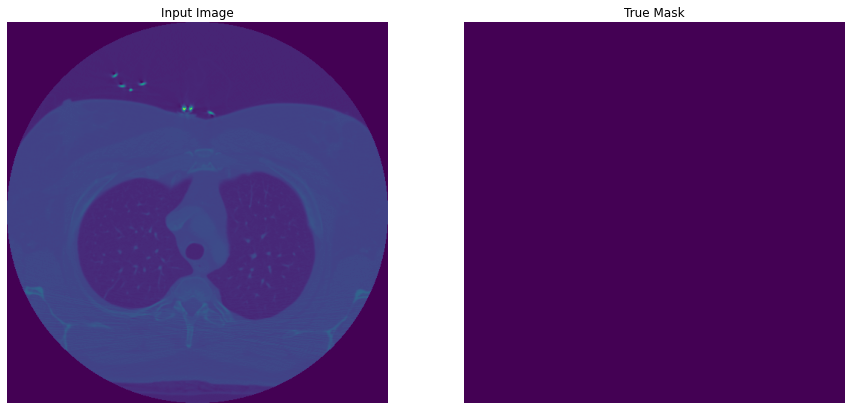

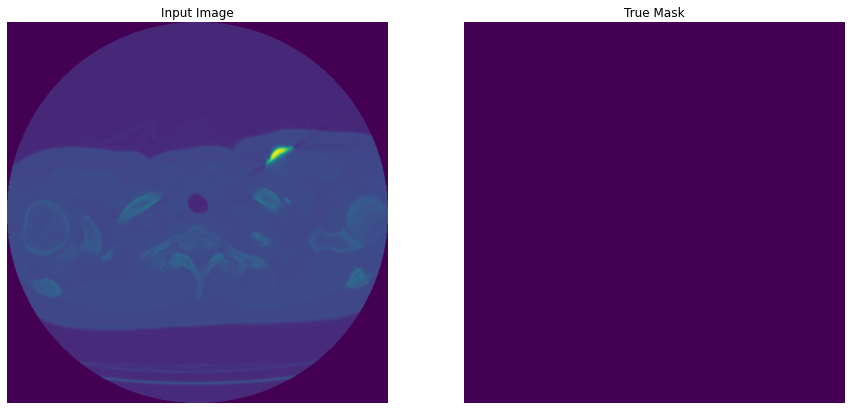

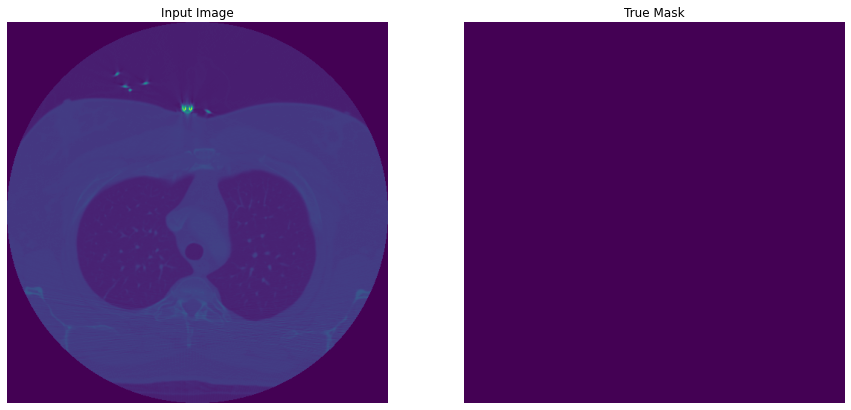

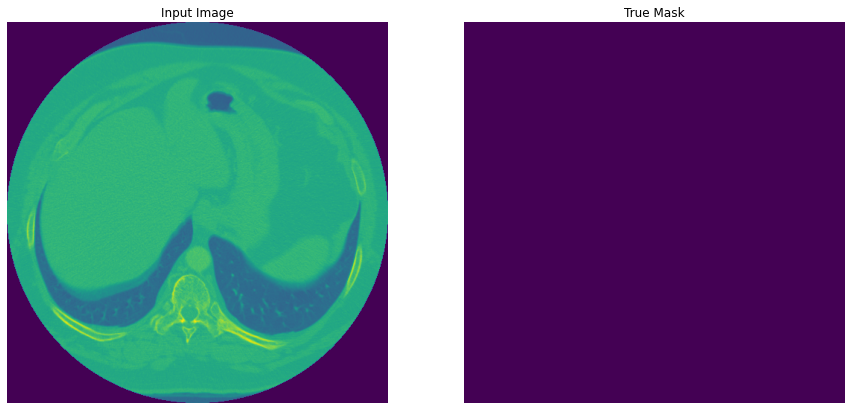

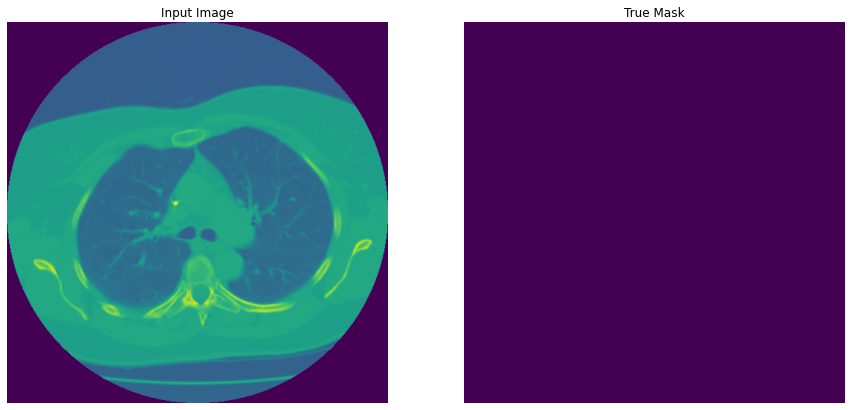

In [18]:
for images, masks in ds_train.shuffle(300).take(5):
    sample_image, sample_mask = images[:,:,0], masks[:,:,0]
    display([sample_image, sample_mask])

In [66]:
#!pip install git+https://github.com/jakeret/unet.git

In [46]:
!pip install git+https://github.com/jakeret/unet.git

  Cloning https://github.com/jakeret/unet.git to /tmp/pip-req-build-eik32i9u
  Running command git clone -q https://github.com/jakeret/unet.git /tmp/pip-req-build-eik32i9u
  Resolved https://github.com/jakeret/unet.git to commit f557a51b6f95aae6848cab6141e6cae573934bf8
  Created wheel for unet: filename=unet-0.0.post0.dev81+gf557a51-py2.py3-none-any.whl size=25690 sha256=bde19987cbba2be33268f5500f3accdb95a9173652562b5304796624c027a1a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-w8g7rh7l/wheels/6f/2d/a5/25ff85a8501ea97085319f56dae96e4fe1a9161df3a6a12499
Successfully built unet


In [61]:
!pip list | grep tensorflow

tensorflow                         2.4.1
tensorflow-estimator               2.6.0
tensorflow-gpu                     2.6.0


In [50]:
!pip list | grep unet

unet                               0.0.post0.dev81+gf557a51


In [32]:
!pip install tensorflow-gpu

     |████████████████████████▋       | 352.2 MB 89.5 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 458.4 MB 20 kB/s s eta 0:00:01
  Using cached grpcio-1.40.0-cp38-cp38-manylinux2014_x86_64.whl (4.3 MB)
     |████████████████████████████████| 1.3 MB 65.2 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 65.2 MB/s eta 0:00:01
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30705 sha256=da8b20bbf55039c2dba49e6d447b175b541cc5ab64fbf6c241c23a69f561b4bb
  Stored in directory: /root/.cache/pip/wheels/f1/60/77/22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built clang
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attemp

In [21]:
import tensorflow as tf
tf.test.gpu_device_name()

2021-09-19 06:12:47.045438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


'/device:GPU:0'

2021-09-19 06:12:47.045796: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-09-19 06:12:47.045958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 06:12:47.046298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 06:12:47.046564: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1872] Adding visible gpu devices: 0
2021-09-19 06:12:47.046602: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-09-19 06:12:47.

In [23]:
import unet
from unet.datasets import circles

In [26]:
LEARNING_RATE = 1e-3
unet_model = unet.build_model(channels=1,
                              num_classes=2,
                              layer_depth=2,
                              filters_root=64)
unet.finalize_model(unet_model, learning_rate=LEARNING_RATE)

In [27]:
trainer = unet.Trainer(checkpoint_callback=False,
                       learning_rate_scheduler=unet.SchedulerType.WARMUP_LINEAR_DECAY,
                       warmup_proportion=0.1,
                       learning_rate=LEARNING_RATE)
trainer.fit(unet_model,
            ds_train,
            ds_train,
            epochs=25,
            batch_size=1)

2021-09-19 05:22:35.963001: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-09-19 05:22:35.963059: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-09-19 05:22:36.255282: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-09-19 05:22:36.255511: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1744] CUPTI activity buffer flushed


Epoch 1/25


ValueError: in user code:

    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 496, 496, 1) and (None, 496, 496, 2) are incompatible


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Model

In [27]:
def get_model(IMG_HEIGHT, IMG_WIDTH):
    in1 = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3 ))

    conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(in1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv4)

    up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
    conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up1)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv5)
    
    up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
    conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
    conv6 = Dropout(0.2)(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv6)

    up2 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
    conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
    conv7 = Dropout(0.2)(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
    segmentation = Conv2D(3, (1, 1), activation='sigmoid', name='seg')(conv7)

    model = Model(inputs=[in1], outputs=[segmentation])

    losses = {'seg': 'binary_crossentropy'
            }

    metrics = {'seg': ['acc']
                }
    model.compile(optimizer="adam", loss = losses, metrics=metrics)

    return model

In [28]:
model = get_model(512, 512)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 512, 512, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 512, 512, 32) 0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 512, 512, 32) 9248        dropout_7[0][0]                  
______________________________________________________________________________________________

In [29]:
!curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  755M  100  755M    0     0  20.4M      0  0:00:36  0:00:36 --:--:-- 21.5M0:39  0:00:13  0:00:26 21.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.2M  100 18.2M    0     0  7830k      0  0:00:02  0:00:02 --:--:-- 7830k


In [30]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"
img_size = (160, 160)
num_classes = 3
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 7390
images/Abyssinian_1.jpg | annotations/trimaps/Abyssinian_1.png
images/Abyssinian_10.jpg | annotations/trimaps/Abyssinian_10.png
images/Abyssinian_100.jpg | annotations/trimaps/Abyssinian_100.png
images/Abyssinian_101.jpg | annotations/trimaps/Abyssinian_101.png
images/Abyssinian_102.jpg | annotations/trimaps/Abyssinian_102.png
images/Abyssinian_103.jpg | annotations/trimaps/Abyssinian_103.png
images/Abyssinian_104.jpg | annotations/trimaps/Abyssinian_104.png
images/Abyssinian_105.jpg | annotations/trimaps/Abyssinian_105.png
images/Abyssinian_106.jpg | annotations/trimaps/Abyssinian_106.png
images/Abyssinian_107.jpg | annotations/trimaps/Abyssinian_107.png


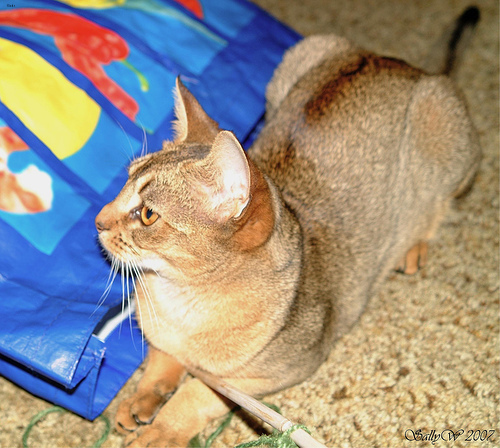

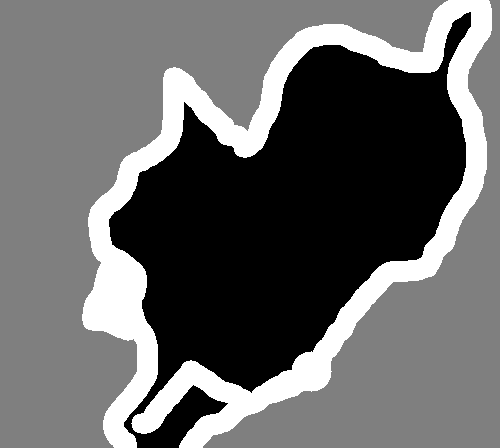

In [31]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

In [32]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y

In [33]:
import random

# Split our img paths into a training and a validation set
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [41]:
a, b = train_gen[0]

In [43]:
a.shape

(32, 160, 160, 3)

In [44]:
b.shape

(32, 160, 160, 1)

In [46]:
b[0, :,:,:].shape

(160, 160, 1)

In [21]:
img_size = (512, 512)
num_classes = 2
batch_size = 16

In [24]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (1,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
#keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [25]:
ds_train = ds_train.shuffle(320).batch(16)

In [ ]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 15
model.fit(ds_train, epochs=epochs, validation_data=ds_train, callbacks=callbacks)

Epoch 1/15


2021-09-19 06:31:11.597607: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudnn.so.8
2021-09-19 06:31:12.310892: I tensorflow/stream_executor/cuda/cuda_dnn.cc:380] Loaded cuDNN version 8202
2021-09-19 06:31:13.104805: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublas.so.11
2021-09-19 06:31:13.740654: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublasLt.so.11


216/216 [==============================] - 337s 2s/step - loss: 0.0745 - val_loss: 0.0011


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
216/216 [==============================] - 322s 1s/step - loss: 0.0112 - val_loss: 0.0018
Epoch 3/15
216/216 [==============================] - 322s 1s/step - loss: 0.0010 - val_loss: 0.0024
Epoch 4/15
216/216 [==============================] - 320s 1s/step - loss: 8.7867e-04 - val_loss: 7.8275e-04
Epoch 5/15
216/216 [==============================] - 321s 1s/step - loss: 0.0013 - val_loss: 6.7211e-04
Epoch 6/15
216/216 [==============================] - 320s 1s/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/15
216/216 [==============================] - 320s 1s/step - loss: 0.0066 - val_loss: 8.8246e-04
Epoch 8/15
216/216 [==============================] - 320s 1s/step - loss: 0.0010 - val_loss: 8.9942e-04
Epoch 9/15
216/216 [==============================] - ETA: 0s - loss: 7.1915e-04